<a href="https://colab.research.google.com/github/dsirtioglu/python/blob/dsirtioglu-RR/RR_NL_Energy_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Netherlands' Electricity Consumption 
Using weather, population and economic output

## Import Libraries


In [ ]:
import pandas as pd
import numpy as np
import copy

import matplotlib
from matplotlib import pyplot as plt

In [ ]:
!pip install cbsodata
import cbsodata

## Import Electricity Balance Data

Sourced from CBS Open Data Stat Line (https://opendata.cbs.nl/statline/portal.html?_la=en&_catalog=CBS&tableId=84575ENG&_theme=1029)

In [ ]:
#Import Electrcity Balance data (Predicted variable: NetConsumptionCalculated_30)
info = cbsodata.get_info('84575ENG')
print(info)

Electricity_balance = pd.DataFrame(cbsodata.get_data('84575ENG')) 

Electricity_balance[Electricity_balance['Periods'].str.contains('1979')]
##Monthly consumption data available from 1979 onwards

{'ID': 0, 'Title': 'Electricity balance sheet; supply and consumption', 'ShortTitle': 'Electricity; supply and consumption', 'Identifier': '84575ENG', 'Summary': 'Electricity, production by energy source, import, export and consumption\n ', 'Modified': '2021-04-30T02:00:00', 'ReasonDelivery': 'Update', 'ExplanatoryText': '', 'Language': 'en', 'Catalog': 'CBS', 'Frequency': 'Monthly', 'Period': '1929- February 2021', 'ShortDescription': '\nThis table shows the supply of electricity. Consumption of electricity is calculated from the supply variables. The supply of electricity primarily includes production plus imports minus exports. The majority of the electricity produced is supplied to the public electricity grid by, for example, power stations and wind turbines. A smaller part is generated by companies themselves for the benefit of their own business processes. For example, many greenhouse companies generate their own electricity for the lighting of their greenhouses. \n\nThe net prod

,ID,Periods,GrossProduction_1,OwnConsumptionForElectrProduction_2,NetProductionTotal_3,NuclearEnergy_4,FuelsTotal_5,Coal_6,OilProducts_7,NaturalGas_8,Biomass_9,OtherFuelsNonRenewable_10,HydroPower_11,WindEnergyTotal_12,WindEnergyOnShore_13,WindEnergyOffShore_14,SolarPhotovoltaic_15,OtherSources_16,ImportsTotal_17,Belgium_18,Denmark_19,Germany_20,UnitedKingdom_21,Norway_22,ExportsTotal_23,Belgium_24,Denmark_25,Germany_26,UnitedKingdom_27,Norway_28,DistributionLosses_29,NetConsumptionCalculated_30
98,98,1979 January,6124.0,248.0,5876.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,23,NaN,NaN,NaN,NaN,NaN,266.0,5591.0
99,99,1979 February,5358.0,220.0,5138.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,20,NaN,NaN,NaN,NaN,NaN,230.0,4889.0
100,100,1979 March,5728.0,231.0,5497.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,246.0,5256.0
101,101,1979 1st quarter,17210.0,699.0,16511.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,41,NaN,NaN,NaN,NaN,NaN,743.0,15735.0
102,102,1979 April,5095.0,212.0,4883.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,219.0,4661.0
103,103,1979 May,5199.0,217.0,4982.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,19,NaN,NaN,NaN,NaN,NaN,223.0,4744.0
104,104,1979 June,4776.0,211.0,4565.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,NaN,NaN,NaN,NaN,NaN,20,NaN,NaN,NaN,NaN,NaN,203.0,4353.0
105,105,1979 2nd quarter,15070.0,640.0,14430.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,NaN,NaN,NaN,NaN,NaN,48,NaN,NaN,NaN,NaN,NaN,645.0,13758.0
106,106,1979 July,4466.0,198.0,4268.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101,NaN,NaN,NaN,NaN,NaN,21,NaN,NaN,NaN,NaN,NaN,187.0,4161.0
107,107,1979 August,4845.0,204.0,4641.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,134,NaN,NaN,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN,NaN,205.0,4548.0


In [100]:
Electricity_balance_quarterly = copy.copy(nl_production[nl_production['Periods'].str.contains('KW')])

Electricity_balance_quarterly.insert(loc = 0,
                            column = 'Period',
                            value = Electricity_balance.Periods.str[:4] + str('Q') + Electricity_balance.Periods.str[-1:])

Electricity_balance_quarterly['Period'] = pd.PeriodIndex(Electricity_balance_quarterly['Period'], freq='Q').to_timestamp()
Electricity_balance_quarterly['NetConsumptionCalculated_30'] = Electricity_balance_quarterly.NetConsumptionCalculated_30.astype(float)
Electricity_balance_quarterly = Electricity_balance_quarterly.set_index('Period')
Electricity_balance_quarterly.tail()

,Periods,GrossProduction_1,OwnConsumptionForElectrProduction_2,NetProductionTotal_3,NuclearEnergy_4,FuelsTotal_5,Coal_6,OilProducts_7,NaturalGas_8,Biomass_9,OtherFuelsNonRenewable_10,HydroPower_11,WindEnergyTotal_12,WindEnergyOnShore_13,WindEnergyOffShore_14,SolarPhotovoltaic_15,OtherSources_16,ImportsTotal_17,Belgium_18,Denmark_19,Germany_20,UnitedKingdom_21,Norway_22,ExportsTotal_23,Belgium_24,Denmark_25,Germany_26,UnitedKingdom_27,Norway_28,DistributionLosses_29,NetConsumptionCalculated_30
Period,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-10-01,2019KW04,32986,976,32010,1062,26763,5889,416,18307,1756,395,21,3527,2452,1075.0,523,113,4685,766,461.0,2972,68.0,417.0,5354,1821,550.0,944,1510.0,530.0,1343,29998.0
2020-01-01,2020KW01,31796,875,30920,1050,23922,2694,433,18628,1782,384,19,4865,3656,1209.0,944,120,5444,602,1186.0,2528,107.0,1021.0,5274,1953,96.0,1720,1471.0,33.0,1332,29759.0
2020-04-01,2020KW02,26903,782,26121,814,19332,1365,279,15541,1706,441,13,2371,1691,680.0,3487,104,5281,1762,539.0,1697,218.0,1065.0,5137,880,465.0,2543,1194.0,55.0,1178,25087.0
2020-07-01,2020KW03,31902,880,31022,987,24307,2293,310,19278,2012,415,2,2667,1603,1065.0,2924,134,3689,490,357.0,1495,130.0,1217.0,6645,2016,491.0,3120,1005.0,14.0,1196,26869.0
2020-10-01,2020KW04,31775,919,30857,1013,23617,3245,273,17400,2284,414,13,5365,2836,2529.0,699,149,5359,928,0.0,3027,86.0,1318.0,5376,2957,1.0,1294,1117.0,8.0,1347,29492.0


In [ ]:
Electricity_balance_quarterly.dtypes

In [ ]:
#Update blank cells with NaN
nl_production_monthly.replace('       .', np.nan, inplace = True)
nl_production_monthly.head(50)

#Convert datatypes to float64
columns = list(nl_production_monthly)
nl_production_monthly[columns] = nl_production_monthly[columns].astype(float)
nl_production_monthly.dtypes

In [ ]:
x = Electricity_balance_quarterly.index
y = Electricity_balance_quarterly.NetConsumptionCalculated_30

plt.scatter(x, y)
plt.show()

## Import Weather Data

Sourced from KNMI data, retrieved from Kaggle open dataset: https://www.kaggle.com/davidzaccai/knmi-19012020-historical-weather-data

In [85]:
#Input variable: Weather - KNMI data (source: https://www.kaggle.com/davidzaccai/knmi-19012020-historical-weather-data)
#Measurements taken from Station 260: De Bilt, Utrecht

url = "https://raw.githubusercontent.com/dsirtioglu/python/dsirtioglu-RR/KNMI_20200710.csv"

Weather = pd.read_csv(url)
Weather.tail(20) 
#TG: avarage daily temperature in 0.1 degrees celsius

#DDVEC: vector mean of wind direction
#FHVEC: vector mean wind speed in 0.1 m/s 
#FG: mean wind speed for a whole day in 0.1 m/s

#SQ: sunshine duration (in 0.1 hours)

#DR: duration of precipitation (in 0.1 hours)
#RH: sum of precipitation for one day (in 0.1 mm)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (2,3,4,5,6,7,8,13,15,16,18,19,20,21,22,23,25,26,28,30,35,36,37,38,39,40) have mixed types.Specify dtype option on import or set low_memory=False.



,STN,YYYYMMDD,DDVEC,FHVEC,FG,FHX,FHXH,FHN,FHNH,FXX,FXXH,TG,TN,TNH,TX,TXH,T10N,T10NH,SQ,SP,Q,DR,RH,RHX,RHXH,PG,PX,PXH,PN,PNH,VVN,VVNH,VVX,VVXH,NG,UG,UX,UXH,UN,UNH,EV24
43636,260,20200621,208,25,35,50,10,10,3,100,11,186,106,4,245,12,70,6,89,53,2030,0,0,0,1,10191,10213,24,10178,14,61,2,82,8,5,69,97,2,48,12,36
43637,260,20200622,285,17,23,30,8,0,24,90,13,178,110,24,224,15,76,24,135,81,2565,0,0,0,1,10248,10262,12,10216,1,56,4,82,10,2,67,96,24,42,12,45
43638,260,20200623,29,7,19,40,18,0,1,60,9,197,94,4,267,16,64,6,153,91,2914,0,0,0,1,10251,10260,8,10239,18,9,1,82,21,1,64,98,1,42,16,53
43639,260,20200624,86,33,34,50,18,10,1,90,15,233,147,2,294,14,103,6,148,88,2900,0,0,0,1,10223,10240,1,10206,18,65,1,83,19,4,52,91,1,33,12,56
43640,260,20200625,108,39,40,60,13,30,2,130,13,240,170,4,294,16,139,6,151,90,2873,0,0,0,1,10177,10207,1,10141,24,75,3,83,1,1,55,73,24,40,13,56
43641,260,20200626,146,24,31,50,9,10,23,100,11,242,190,3,301,15,153,6,128,76,2817,36,34,16,22,10110,10139,1,10086,18,24,24,82,13,3,61,98,24,35,16,55
43642,260,20200627,214,35,36,60,15,10,1,150,19,206,175,21,248,12,162,24,58,35,1663,12,21,16,7,10086,10094,23,10077,17,12,1,83,18,7,79,98,1,60,13,31
43643,260,20200628,227,51,52,70,9,30,21,140,10,179,152,24,214,16,132,24,94,56,2132,3,1,1,4,10114,10125,14,10090,1,74,11,83,23,5,60,73,3,45,17,37
43644,260,20200629,225,56,58,70,11,40,2,150,20,160,133,4,190,17,118,6,44,26,1408,0,-1,-1,1,10103,10113,11,10087,24,70,24,83,1,7,62,76,5,48,17,24
43645,260,20200630,224,49,51,70,10,20,23,150,10,160,141,6,194,13,139,6,12,7,943,82,126,28,18,10076,10086,10,10063,24,29,19,81,13,8,82,97,24,61,13,16


In [84]:
Weather.dtypes

In [95]:
#Create Datetime from YYYYMMDD

Weather['Date'] = pd.to_datetime(Weather['YYYYMMDD'].astype(int), format = '%Y%m%d')
Weather['Year'] = Weather['Date'].dt.year.astype(str)
Weather['Quarter'] = Weather['Date'].dt.quarter.astype(str)
#Weather['Period'] = pd.PeriodIndex(Weather.Date, freq='Q')
Weather.drop(columns = 'Period', axis=1, inplace = True)
Weather.insert(loc = 0,
                column = 'Period',
                value = Weather.Year + str('Q') + Weather.Quarter)
Weather['Period'] = pd.PeriodIndex(Weather['Period'], freq='Q').to_timestamp()
Weather.head(10)

,Period,STN,YYYYMMDD,DDVEC,FHVEC,FG,FHX,FHXH,FHN,FHNH,FXX,FXXH,TG,TN,TNH,TX,TXH,T10N,T10NH,SQ,SP,Q,DR,RH,RHX,RHXH,PG,PX,PXH,PN,PNH,VVN,VVNH,VVX,VVXH,NG,UG,UX,UXH,UN,UNH,EV24,Date,Year,Quarter
0,1901-01-01,260,19010101,,,,,,,,,,-49,-65,,-24,,,,28,36,,,,,,,,,,,,,,,,66,,,,,,1901-01-01,1901,1
1,1901-01-01,260,19010102,,,,,,,,,,-18,-33,,-14,,,,0,0,,,,,,,,,,,,,,,,86,,,,,,1901-01-02,1901,1
2,1901-01-01,260,19010103,,,,,,,,,,-26,-76,,-6,,,,0,0,,,,,,,,,,,,,,,,89,,,,,,1901-01-03,1901,1
3,1901-01-01,260,19010104,,,,,,,,,,-65,-90,,-11,,,,0,0,,,,,,,,,,,,,,,,79,,,,,,1901-01-04,1901,1
4,1901-01-01,260,19010105,,,,,,,,,,-60,-82,,-20,,,,36,46,,,,,,,,,,,,,,,,65,,,,,,1901-01-05,1901,1
5,1901-01-01,260,19010106,,,,,,,,,,-100,-114,,-80,,,,61,77,,,,,,,,,,,,,,,,63,,,,,,1901-01-06,1901,1
6,1901-01-01,260,19010107,,,,,,,,,,-92,-121,,-68,,,,28,35,,,,,,,,,,,,,,,,71,,,,,,1901-01-07,1901,1
7,1901-01-01,260,19010108,,,,,,,,,,-49,-93,,-7,,,,19,24,,,,,,,,,,,,,,,,79,,,,,,1901-01-08,1901,1
8,1901-01-01,260,19010109,,,,,,,,,,11,-26,,44,,,,3,4,,,,,,,,,,,,,,,,76,,,,,,1901-01-09,1901,1
9,1901-01-01,260,19010110,,,,,,,,,,15,-15,,61,,,,39,48,,,,,,,,,,,,,,,,82,,,,,,1901-01-10,1901,1


In [96]:
#Create the quarterly average weather dataset
Weather_Quarterly = Weather.groupby(['Period'], as_index = False).mean()
Weather_Quarterly = Weather_Quarterly[Weather_Quarterly['Period'] >= '1970-01-01']
Weather_Quarterly

,Period,STN,YYYYMMDD,TG,TN,TX
276,1970-01-01,260.0,1.970022e+07,15.722222,-14.733333,46.244444
277,1970-04-01,260.0,1.970052e+07,122.736264,72.472527,170.670330
278,1970-07-01,260.0,1.970081e+07,156.978261,109.521739,204.673913
279,1970-10-01,260.0,1.970112e+07,68.923913,36.978261,99.467391
280,1971-01-01,260.0,1.971022e+07,29.177778,-4.133333,59.566667
...,...,...,...,...,...,...
474,2019-07-01,260.0,2.019081e+07,172.793478,117.336957,223.032609
475,2019-10-01,260.0,2.019112e+07,79.391304,49.239130,109.760870
476,2020-01-01,260.0,2.020022e+07,67.340659,34.516484,96.153846
477,2020-04-01,260.0,2.020052e+07,138.945055,75.329670,195.329670


In [97]:
Weather_Quarterly.dtypes

Period      datetime64[ns]
STN                float64
YYYYMMDD           float64
TG                 float64
TN                 float64
TX                 float64
dtype: object

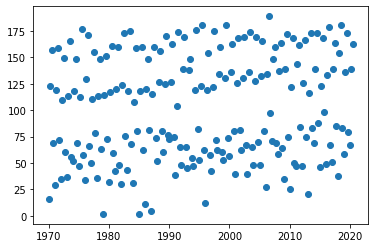

In [99]:
x = Weather_Quarterly.Period
y = Weather_Quarterly.TG

plt.scatter(x, y)
plt.show()

## Import Economic Output Data

Sourced from https://data.oecd.org/gdp/quarterly-gdp.htm

In [ ]:
#Input variable: Economic Output
#Yearly and quarterly percentage changes, all countries

url = 'https://raw.githubusercontent.com/dsirtioglu/python/dsirtioglu-RR/Quarterly%20GDP.csv'

GDP = pd.read_csv(url)
GDP.head(20) 

##Filters to be applied: 

# LOCATION = NLD
# INDICATOR = 'QGDP'
# SUBJECT = 'TOT'
# MEASURE = 'PC_CHGPP'
# FREQUENCY = 'Q' -- For quarterly values
# Flag Codes = E (?)

#Note that 'Value' field indicate the percentage change from the previous quarter in GDP


In [30]:
GDP.dtypes

LOCATION       object
INDICATOR      object
SUBJECT        object
MEASURE        object
FREQUENCY      object
TIME           object
Value         float64
Flag Codes     object
dtype: object

In [ ]:
#Apply relevant filters

GDP_NL = GDP.loc[(GDP['LOCATION'] == 'NLD') & (GDP['INDICATOR'] == 'QGDP') & (GDP['SUBJECT'] == 'TOT') & (GDP['MEASURE'] == 'PC_CHGPP') & (GDP['FREQUENCY'] == 'Q')]
GDP_NL = GDP_NL.set_index('TIME')
GDP_NL

In [29]:
GDP_NL.dtypes

LOCATION       object
INDICATOR      object
SUBJECT        object
MEASURE        object
FREQUENCY      object
Value         float64
Flag Codes     object
dtype: object

In [ ]:
x = GDP_NL.index
y = GDP_NL.Value

plt.scatter(x, y)
plt.gcf().set_size_inches((20, 20))
plt.show

## Import Population data

Sourced from https://data.oecd.org/pop/population.htm#indicator-chart

In [106]:
#Input variable: Population
#Population, all countries

url = 'https://raw.githubusercontent.com/dsirtioglu/python/main/World%20Population.csv'

POP = pd.read_csv(url)
POP.tail(10) 

##Filters to be applied: 

# LOCATION = NLD
# INDICATOR = 'POP'
# SUBJECT = 'TOT'
# MEASURE = 'MLN_PER' indicates million persons; 'AGRWTH' annual growth rate
# FREQUENCY = 'A' -- Only annual data available


,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
13710,G20,POP,TOT,AGRWTH,A,2009,0.8916,NaN
13711,G20,POP,TOT,AGRWTH,A,2010,0.7988,NaN
13712,G20,POP,TOT,AGRWTH,A,2011,0.8233,NaN
13713,G20,POP,TOT,AGRWTH,A,2012,0.8297,NaN
13714,G20,POP,TOT,AGRWTH,A,2013,0.8182,NaN
13715,G20,POP,TOT,AGRWTH,A,2014,0.8136,NaN
13716,G20,POP,TOT,AGRWTH,A,2015,0.7824,NaN
13717,G20,POP,TOT,AGRWTH,A,2016,0.7526,NaN
13718,G20,POP,TOT,AGRWTH,A,2017,0.7262,NaN
13719,G20,POP,TOT,AGRWTH,A,2018,0.7037,NaN


In [ ]:
#Apply relevant filters

POP_NL = POP.loc[(POP['LOCATION'] == 'NLD') & (POP['INDICATOR'] == 'POP') & (POP['SUBJECT'] == 'TOT') & (POP['MEASURE'] == 'MLN_PER')]
POP_NL = POP_NL.set_index('TIME')
POP_NL.tail(10)

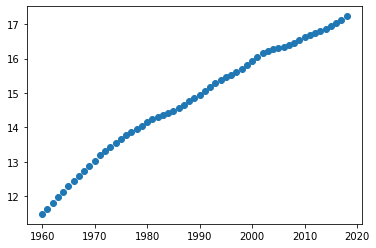

In [109]:
x = POP_NL.index
y = POP_NL.Value

plt.scatter(x, y)
plt.show()

# Notes

## Kaan Notes



https://bkaankuguoglu.medium.com/building-rnn-lstm-and-gru-for-time-series-using-pytorch-a46e5b094e7b

https://thecleverprogrammer.com/2021/01/23/energy-consumption-prediction-with-machine-learning/ 

In [ ]:
import plotly.graph_objs as go
from plotly.offline import iplot

def plot_dataset(df, title):
    data = []
    value = go.Scatter(
        x=df.index,
        y=df.value,
        mode="lines",
        name="values",
        marker=dict(),
        text=df.index,
        line=dict(color="rgba(0,0,0, 0.3)"),
    )
    data.append(value)

    layout = dict(
        title=title,
        xaxis=dict(title="Date", ticklen=5, zeroline=False),
        yaxis=dict(title="Value", ticklen=5, zeroline=False),
    )

    fig = dict(data=data, layout=layout)
    iplot(fig)


#plot_dataset(nl_production_monthly, title='Energy Production Million kWh')

In [ ]:
import matplotlib.pyplot as plt

x = nl_production_monthly.index


i = 1
cols=[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
plt.figure(figsize=(20, 10))
for col in cols:
    plt.subplot(len(cols), 1, i)
    plt.plot(x, nl_production_monthly.values[:, col])
    plt.title(nl_production_monthly.columns[col], y=0.75, loc='left')
    i += 1
plt.show()

In [ ]:
plt.plot(x, nl_production_monthly.values[:, 13])
plt.title(nl_production_monthly.columns[13], y=0.75, loc='left')

plt.plot(x, nl_production_monthly.values[:, 14])
plt.title(nl_production_monthly.columns[14], y=0.75, loc='left')

##Import using cbsodata library 

(documentation: https://pypi.org/project/cbsodata/)


In [ ]:
tables = pd.DataFrame(cbsodata.get_table_list())
tables.head()

In [ ]:
info = cbsodata.get_info('83693ENG')
print(info)

In [ ]:
Confidence_data = pd.DataFrame(cbsodata.get_data('83693ENG')) ##Consumer confidence, economic climate and willingness to buy
Confidence_data.head()


In [ ]:
GDP_data = pd.DataFrame(cbsodata.get_data('84087ENG')) ##Approaches of domestic product (GDP); National Accounts
GDP_data.head()

In [ ]:
GDP_data = pd.DataFrame(cbsodata.get_data('84105ENG')) ##GDP, output and expenditures; value, Quarterly National Accounts
GDP_data.head()

In [ ]:
House_prices = pd.DataFrame(cbsodata.get_data('83625ENG')) ##Existing own homes; prices, region
House_prices.head()

In [ ]:
Rent_increase = pd.DataFrame(cbsodata.get_data('70675eng')) ##Consumer prices; rent increase for dwellings
Rent_increase.head()

## What history tells you about post pandemic booms?

(https://www.economist.com/finance-and-economics/2021/04/29/what-history-tells-you-about-post-pandemic-booms)